<a href="https://colab.research.google.com/github/wilianairawan/Daspro/blob/main/Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
pendapatan = np.array([5, 10, 20, 8, 4, 6, 12, 15])  # Pendapatan rata-rata (1000$)
penjualan = np.array([27, 46, 73, 40, 30, 28, 46, 59])  # Penjualan Pizza (1000 buah)

In [ ]:
#Load dataset
df = pd.read_csv("Dataset.csv", delimiter=";")
df.columns = ["Kota", "Pendapatan", "Penjualan_Pizza"]
df["Pendapatan"] = pd.to_numeric(df["Pendapatan"])
df["Penjualan_Pizza"] = pd.to_numeric(df["Penjualan_Pizza"])

In [ ]:

#Buat kategori target: 0 = penjualan rendah, 1 = penjualan tinggi
median_penjualan = df["Penjualan_Pizza"].median()
df["Kategori"] = (df["Penjualan_Pizza"] >= median_penjualan).astype(int)


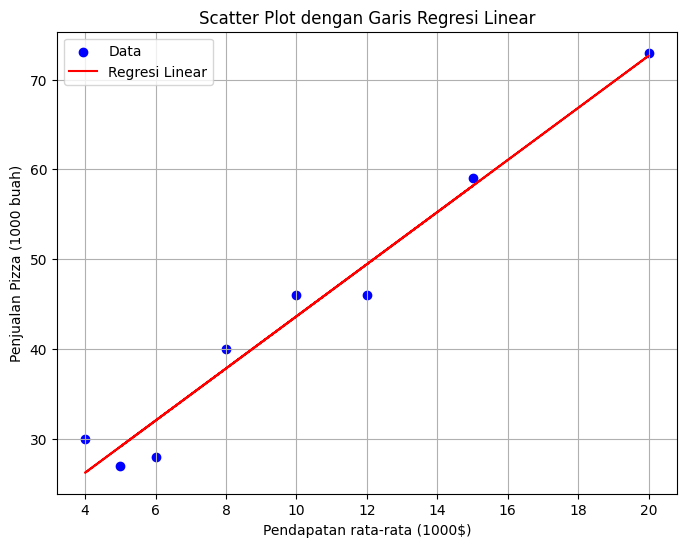

In [3]:
# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(pendapatan, penjualan)

# Prediksi nilai berdasarkan regresi linear
predicted_penjualan = slope * pendapatan + intercept

# Scatter plot dengan garis regresi
plt.figure(figsize=(8,6))
plt.scatter(pendapatan, penjualan, color='blue', label='Data')
plt.plot(pendapatan, predicted_penjualan, color='red', label='Regresi Linear')
plt.xlabel('Pendapatan rata-rata (1000$)')
plt.ylabel('Penjualan Pizza (1000 buah)')
plt.title('Scatter Plot dengan Garis Regresi Linear')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Hitung SSR, SSE, SST, dan R^2
sst = np.sum((penjualan - np.mean(penjualan))**2)  # Total Sum of Squares (SST)
ssr = np.sum((predicted_penjualan - np.mean(penjualan))**2)  # Regression Sum of Squares (SSR)
sse = np.sum((penjualan - predicted_penjualan)**2)  # Error Sum of Squares (SSE)
r_squared = r_value**2  # Koefisien determinasi (R^2)

# Menampilkan hasil perhitungan
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"SSR (Regression Sum of Squares): {ssr:.2f}")
print(f"SSE (Error Sum of Squares): {sse:.2f}")
print(f"SST (Total Sum of Squares): {sst:.2f}")
print(f"R^2 (Koefisien determinasi): {r_squared:.4f}")


Slope: 2.90
Intercept: 14.58
SSR (Regression Sum of Squares): 1771.90
SSE (Error Sum of Squares): 57.97
SST (Total Sum of Squares): 1829.88
R^2 (Koefisien determinasi): 0.9683
